In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

2025-02-02 17:06:45.633799: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-02-02 17:06:45.640987: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2903995000 Hz
2025-02-02 17:06:45.642384: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9388000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-02 17:06:45.642417: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-02 17:06:45.645323: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-02-02 17:06:46.087234: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-02 17:06:46.08

(1440, 1080, 3)


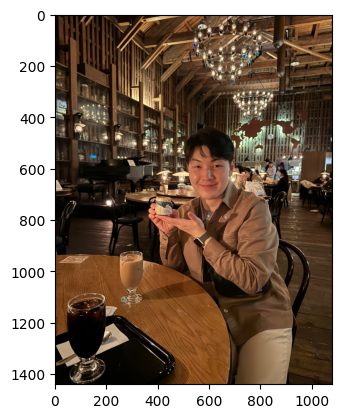

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = 'my_image.jpg'  
img_orig = cv2.imread(img_path) 

# print(type(img_orig))
print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = './models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('./models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f946c4273d0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

2025-02-02 17:06:54.190301: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-02 17:06:54.190424: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2025-02-02 17:06:54.190623: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/maeng/anaconda3/envs/pixellib_env/lib/python3.7/site-packages/cv2/../../lib64::/usr/local/cuda-11.8/lib64/
2025-02-02 17:06:54.190720: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic libr

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

2025-02-02 17:07:06.973046: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 169869312 exceeds 10% of free system memory.
2025-02-02 17:07:06.973057: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 117964800 exceeds 10% of free system memory.
2025-02-02 17:07:06.973046: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 75497472 exceeds 10% of free system memory.


In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

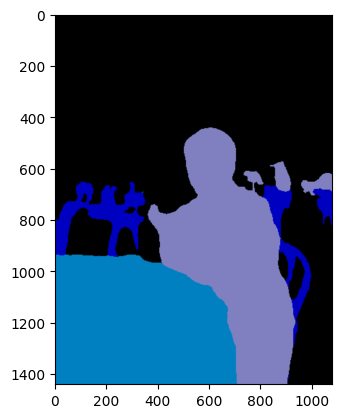

(1440, 1080, 3)


In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()
print(output.shape)

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  9, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
diningtable
person


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(1440, 1080)


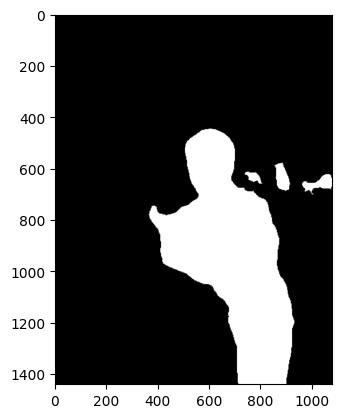

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

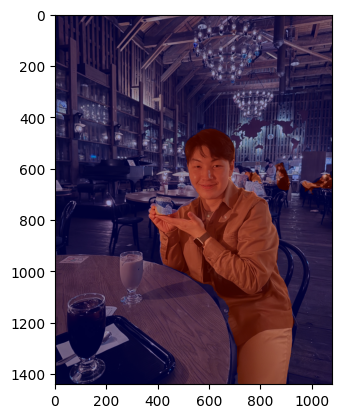

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

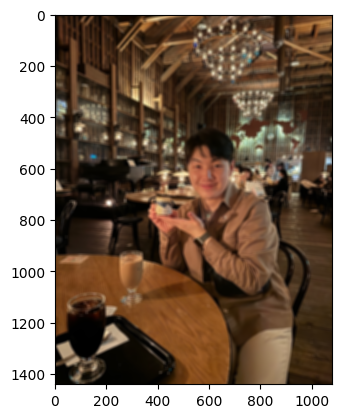

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

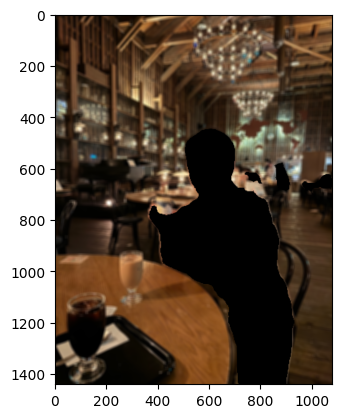

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

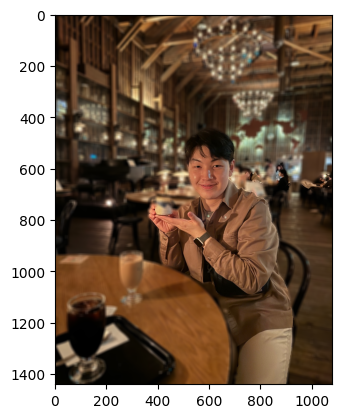

In [17]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

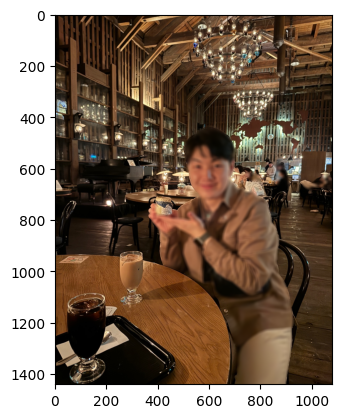

In [18]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color==0, img_orig, img_orig_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 프로젝트 시작

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

2025-02-02 21:40:59.513931: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-02-02 21:40:59.538375: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2903995000 Hz
2025-02-02 21:40:59.543491: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3d38000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-02 21:40:59.543548: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-02 21:40:59.558025: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-02-02 21:41:00.189660: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-02 21:41:00.18

In [14]:
def load_img(img_path, show=False):
    origin_img = cv2.imread(img_path) 
    # result = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

    if show:
        plt.imshow(origin_img)
        plt.show()

    return origin_img

def get_semantic_segmentation_model(model_path):
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_path)

    return model

def get_label_names():
    LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

    return LABEL_NAMES

def get_colormap(n=20):
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    return colormap[:n] #생성한 n개의 컬러맵 출력

def show_segmentation(img_path, model_path, model=None, colormap_index=15, show_class_ids=False):
    # origin 이미지지
    origin_img = load_img(img_path)
    # plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

    # 모델 불러오기기
    if model:
        pass
    
    else:
        model = get_semantic_segmentation_model(model_path)

    #pascalvoc 데이터의 라벨종류
    LABEL_NAMES = get_label_names()

    # 이미지 세그멘테이션션
    segvalues, output = model.segmentAsPascalvoc(img_path)

    class_list = list()
    for class_id in segvalues['class_ids']:
        class_list.append(LABEL_NAMES[class_id])
    if show_class_ids:
        print(class_list)

    # 컬러맵 만들기
    colormap = get_colormap()

    # 사람의 컬러맵 = 15, 강아지는 = 12
    seg_color = colormap[colormap_index]
    # RGB to BGR
    seg_color = [seg_color[2], seg_color[1], seg_color[0]]

    # 세그멘테이션 맵
    seg_map = np.all(output==seg_color, axis=-1)
    # plt.imshow(seg_map, cmap='gray')

    # 세그멘테이션 된 이미지
    segmented_img = origin_img.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    segmented_img = cv2.addWeighted(segmented_img, 0.6, color_mask, 0.4, 0.0)
    segmented_img = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)

    # 블러처리 이미지
    blur_img = cv2.blur(origin_img, (13,13))
    # plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))

    # origin_img + blur_img

    # 이미지 마스크 RGB로
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(blur_img, img_bg_mask)

    # 이미지 합치기기
    img_concat = np.where(img_mask_color==255, origin_img, img_bg_blur)
    final_img = cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)

    # 출력할 이미지
    '''
    원본이미지 = origin_img
    모델로 추론한 이미지 = output
    타겟 세그멘티드 맵 = seg_map
    타겟 세그멘티드 이미지 + 원본 = segmented_img
    블러처리된 이미지 = blur_img
    최종 이미지 = final_img
    '''
    plt.figure(figsize=(15, 10))

    # 서브플롯 간격 조절
    plt.subplots_adjust(wspace=0.2, hspace=0.3)  # wspace: 수평 간격, hspace: 수직 간격

    plt.subplot(231)
    plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(output)
    plt.axis('off')
    plt.title('Segmented Image')

    plt.subplot(233)
    plt.imshow(seg_map, cmap='gray')
    plt.axis('off')
    plt.title('Segment Map')

    plt.subplot(234)
    plt.imshow(segmented_img)
    plt.axis('off')
    plt.title('Target Segmented Image')

    plt.subplot(235)
    plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Blurred Image')

    plt.subplot(236)
    plt.imshow(final_img)
    plt.axis('off')
    plt.title('Background Blurred Image')

    plt.show()

In [3]:
# 모델 불러오기
model_path = './models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model = get_semantic_segmentation_model(model_path)

2025-02-02 21:41:01.065759: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-02 21:41:01.065828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.815GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2025-02-02 21:41:01.065980: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/maeng/anaconda3/envs/pixellib_env/lib/python3.7/site-packages/cv2/../../lib64::/usr/local/cuda-11.8/lib64/
2025-02-02 21:41:01.066070: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic libr

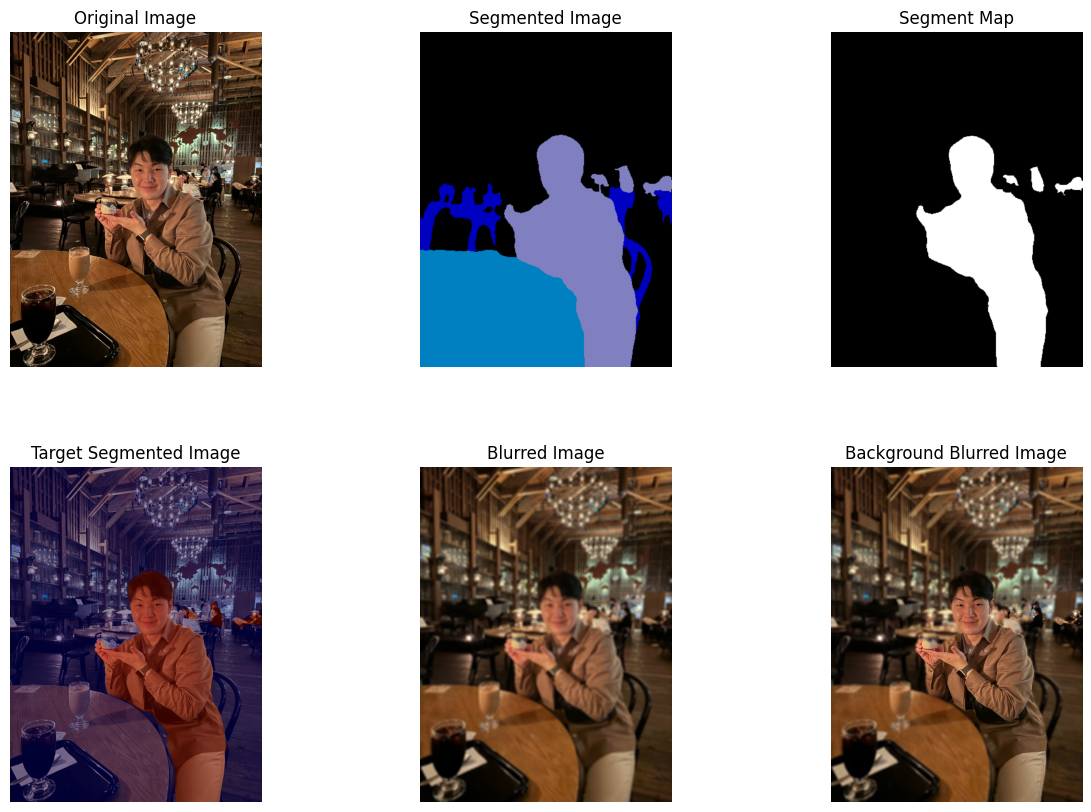

In [15]:
# 이미지 경로 설정
img_path = 'my_image.jpg'

# 이미지 출력
show_segmentation(img_path, model_path, model, colormap_index=15, show_class_ids=False)

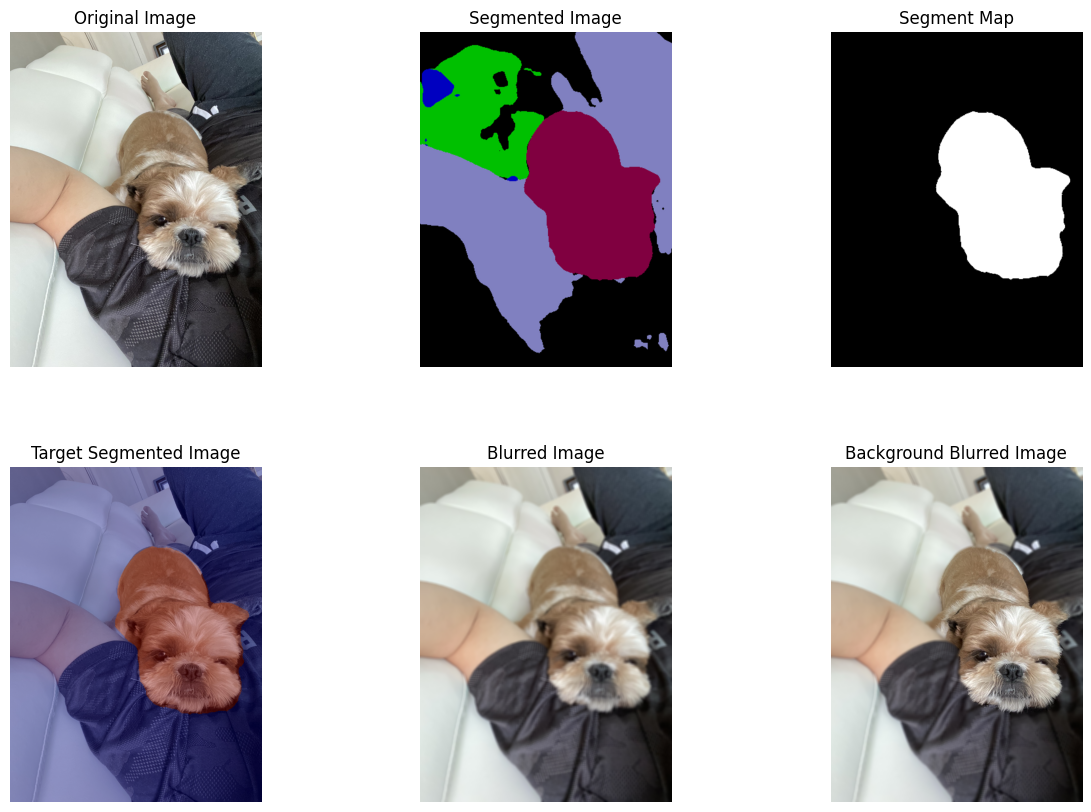

In [16]:
# 이미지 경로 설정
img_path = 'siru_img.jpg'

# 이미지 출력
show_segmentation(img_path, model_path, model=None, colormap_index=12, show_class_ids=False)

In [20]:
img_path = 'siru_img.jpg'
origin_img = cv2.imread(img_path)

origin_img_shape = origin_img.shape
origin_img_shape

(1440, 1080, 3)

In [19]:
background_img_path = 'universe_background.jpg'
org_bg_img = cv2.imread(background_img_path)

org_bg_img.shape

(1080, 1920, 3)

In [23]:
# 크기 변경 (가로 1080, 세로 1440)
resized_image = cv2.resize(org_bg_img, (origin_img_shape[1], origin_img_shape[0]))  # (width, height)

# 변경된 이미지 크기 확인
print("Resized shape:", resized_image.shape)  # (1440, 1080, 3)

Resized shape: (1440, 1080, 3)


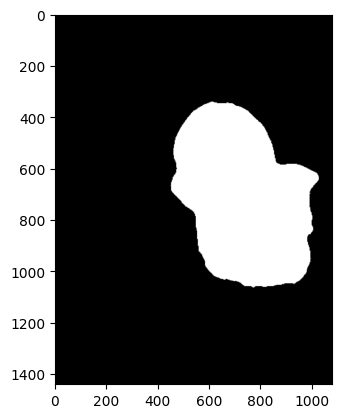

In [24]:
# origin 이미지지
origin_img = load_img(img_path)
# plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

# 모델 불러오기기
model = get_semantic_segmentation_model(model_path)

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = get_label_names()

# 이미지 세그멘테이션션
segvalues, output = model.segmentAsPascalvoc(img_path)

# 컬러맵 만들기
colormap = get_colormap()

# 사람의 컬러맵 = 15, 강아지는 = 12
seg_color = colormap[12]
# RGB to BGR
seg_color = [seg_color[2], seg_color[1], seg_color[0]]

# 세그멘테이션 맵
seg_map = np.all(output==seg_color, axis=-1)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [26]:
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

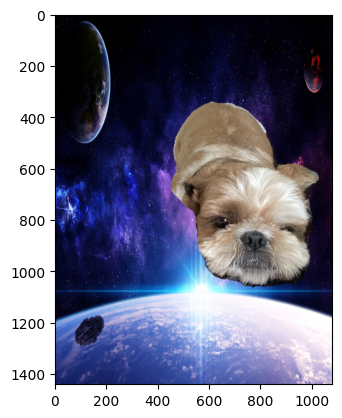

In [28]:
img_show = origin_img.copy()

img_concat = np.where(img_mask_color==255, origin_img, resized_image)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()